In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import os
import random

In [8]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "drop"])

df = pd.read_csv("./data/KDDTRAIN+.txt")
df.columns = col_names
df.drop(columns=['drop'], inplace=True)
df.to_csv("./data/KDD_small.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [11]:
df_large = pd.read_csv("../../reserve/kddcup.data")
cols = "duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack".split(",")
df_large.columns = cols 
df_large

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [5]:
df_crypt = pd.read_csv('./cryptomining_kdd.csv')
df_crypt.index += len(df)
df_crypt

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
125972,3,udp,domain_u,S0,85,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
125973,0,tcp,other,OTH,0,0,0,0,0,0,...,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
125974,0,tcp,other,OTH,0,0,0,0,0,0,...,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
125975,0,tcp,other,OTH,0,0,0,0,0,0,...,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
125976,5,tcp,other,OTH,5850,0,0,0,0,0,...,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126568,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
126569,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
126570,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
126571,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [14]:
len(df['attack'].value_counts())

23

In [13]:
len(df_large['attack'].value_counts())

23

In [11]:
# This DataFrame appears to be based on the KDD Cup 1999 / NSL-KDD intrusion detection dataset.
# Each column represents a feature of network connections, used for detecting attacks or anomalies:
#
# Basic Connection Features:
# duration                      : Length (in seconds) of the connection.
# protocol_type                 : Transport protocol used (TCP, UDP, ICMP).
# service                       : Destination network service (e.g., http, ftp, telnet).
# flag                          : Status flag of the connection (e.g., SF, REJ, RSTO).
# src_bytes                     : Bytes sent from source to destination.
# dst_bytes                     : Bytes sent from destination to source.
# land                          : 1 if source and destination IP/port are the same (LAND attack indicator).
# wrong_fragment                : % of wrong/malformed IP fragments.
# urgent                        : % of urgent packets (rare in normal traffic).
#
# Content Features (Within a Connection):
# hot                           : % of “hot” indicators (suspicious activities or system calls).
# num_failed_logins             : % of failed login attempts.
# logged_in                     : 1 if login was successful, 0 otherwise.
# num_compromised               : % of compromised conditions observed.
# root_shell                    : 1 if root shell was obtained, 0 otherwise.
# su_attempted                  : 1 if "su root" (superuser) was attempted.
# num_root                      : % of accesses to root-level files/processes.
# num_file_creations            : % of files created during the connection.
# num_shells                    : % of shell prompts invoked.
# num_access_files              : % of operations on access-control files (e.g., /etc/passwd).
# num_outbound_cmds             : % of outbound commands executed (always 0 in KDD dataset).
# is_host_login                 : 1 if login belongs to a host account.
# is_guest_login                : 1 if login used a guest account.
#
# Traffic Features (Same Host / Same Service in short time window):
# count                         : % of connections to the same host in the past 2 seconds.
# srv_count                     : % of connections to the same service in past 2 seconds.
# serror_rate                   : % of connections with SYN errors.
# srv_serror_rate               : % of connections with SYN errors to the same service.
# rerror_rate                   : % of connections with REJ errors.
# srv_rerror_rate               : % of REJ errors to the same service.
# same_srv_rate                 : % of connections to the same service.
# diff_srv_rate                 : % of connections to different services.
# srv_diff_host_rate            : % of connections to same service but different hosts.
#
# Host-Level Traffic Features (Aggregated over last 100 connections):
# dst_host_count                : % of connections to the same destination host.
# dst_host_srv_count            : % of connections to the same service on the same host.
# dst_host_same_srv_rate        : % of connections to the same service for the destination host.
# dst_host_diff_srv_rate        : % of connections to different services for the destination host.
# dst_host_same_src_port_rate   : % of connections to same port from same source.
# dst_host_srv_diff_host_rate   : % of connections to same service from different hosts.
# dst_host_serror_rate          : % of connections to the host with SYN errors.
# dst_host_srv_serror_rate      : % of connections to same service with SYN errors.
# dst_host_rerror_rate          : % of connections to the host with REJ errors.
# dst_host_srv_rerror_rate      : % of connections to same service with REJ errors.
#
# Label:
# attack                        : Class label for the connection ('normal.' or a specific attack type such as 'smurf.', 'neptune.', etc.).


In [22]:
attack_types = [
    'back.',            # Backdoor: attacker installs or enables secret remote access (a "backdoor") so they can later control the machine without normal authentication. Look for unusual listening services, unknown user accounts, or persistent startup entries.
    'buffer_overflow.', # Buffer overflow: attacker crafts input that overruns memory buffers to overwrite program state and execute arbitrary code (often leads to remote code execution). Signs: crashes, weird process behavior, or exploit attempts in application logs.
    'cryptomining',     # Testing for 
    'ftp_write.',       # FTP write: attacker authenticates or exploits an FTP server to upload or modify files (webshells, malware, or data tampering). Detection: unexpected new/modified files on FTP dirs or file uploads from unusual IPs.
    'guess_passwd.',    # Guessing passwords (brute force): automated attempts to discover credentials by trying many username/password combos. Detection: lots of failed login attempts, many distinct sources, or rapid repeated attempts from one IP.
    'imap.',            # IMAP attacks: attempts targeting IMAP mail servers (credential stuffing, brute force, or exploiting server bugs) to read/steal mail or use mail service as pivot. Watch for abnormal IMAP logins, unusual IPs, or excessive mailbox access.
    'ipsweep.',         # IP sweep: scanner probes a range of IP addresses to find hosts that respond (basic reconnaissance). Detection: many connection attempts across consecutive IPs and short time windows.
    'land.',            # LAND DoS: forged packets with the same source and destination IP/port (src==dst) that confuse some TCP/IP stacks and may crash or hang the target. Detection: packets where source==destination or peculiar TCP resets/crashes.
    'loadmodule.',      # Load module attack: attacker attempts to upload and load a malicious kernel/module or server module (executes code in privileged context). Look for suspicious module loads, new binaries, or privilege-escalation attempts.
    'multihop.',        # Multihop (proxying/pivoting): attacker routes access via one or more compromised machines to hide origin and reach otherwise inaccessible systems. Indicators: strange relay connections, tunnels, or unusual intermediate hosts in logs.
    'neptune.',         # Neptune (SYN flood): classic TCP SYN flood that sends many connection requests without completing handshakes, exhausting connection tables and causing DoS. Symptoms: many half-open connections and resource exhaustion on the target.
    'nmap.',            # Nmap scanning: active port/service/OS scanning with the nmap tool (reconnaissance to discover services and vulnerabilities). Detection: diverse ports probed from same IP, fingerprinting patterns or TTL/packet patterns matching nmap.
    'normal.',          # Normal traffic: legitimate, benign network activity — not an attack. Helpful as baseline for anomaly detection.
    'perl.',            # Perl/CGI script attacks: exploitation of Perl-based CGI scripts or server-side Perl apps to run arbitrary commands or upload malware. Watch for suspicious HTTP requests invoking CGI scripts or file writes from webserver processes.
    'phf.',             # phf CGI exploit: a historical web CGI vulnerability (phf) where specially crafted requests could execute commands on the server. Detection: web requests with unusual query payloads to phf or unexpected command output/files.
    'pod.',             # POD (Ping of Death / Packet of Death): sending oversized or malformed ICMP packets that cause older systems to crash or reboot. Symptoms: malformed ICMP traffic and sudden crashes/reboots after such packets.
    'portsweep.',       # Port sweep: scanning many ports across one or more hosts to find available services (more focused than IPSweep). Detect by seeing many connection attempts to different ports from the same source.
    'rootkit.',         # Rootkit: stealthy malware installed at high (often kernel) privilege to hide attacker presence and maintain persistent control. Look for hidden processes, altered system binaries, unusual kernel modules, or tampered audit logs.
    'satan.',           # SATAN scanner activity: use of the SATAN vulnerability scanner to enumerate known weaknesses (historical tool similar to Nessus). Detection: a set of targeted probes for known vulnerabilities and misconfigurations.
    'smurf.',           # Smurf attack: amplification DoS using spoofed ICMP echo requests sent to broadcast addresses which then flood the victim with replies. Detection: many ICMP replies from broadcast networks with spoofed source IPs.
    'spy.',             # Spy / sniffing activity: passive capture of network traffic or installation of spyware to steal credentials/data. Indicators: suspicious promiscuous-mode network interfaces, odd packet captures, or data exfiltration.
    'teardrop.',        # Teardrop: DoS that sends overlapping or malformed IP fragments which crash or confuse vulnerable IP reassembly code. Symptoms: fragmented packets with invalid offsets and crashes/restarts on affected systems.
    'warezclient.',     # Warez client behavior: client machines contacting servers to download pirated software — in IDS datasets this often signals suspicious P2P or illicit file-sharing activity which can correlate with other threats. Look for repeated connections to known warez servers or P2P ports.
    'warezmaster.'      # Warez master: server/operator coordinating the distribution of pirated software (the source/origin of warez). Detection: servers receiving many upload requests or hosting many illicit files and responding to many download clients.
]


In [15]:
def prep_df(df, binary=False) -> pd.DataFrame:
    def cat_col(df, cols):
        ret = df.copy()
        for c in cols:
            ret[c] = df[c].astype('category').cat.codes
        return ret
    
    ret = cat_col(df, ["protocol_type", "service", "flag", "attack"])
    if binary:
        ret['attack'] = np.where(ret['attack'] == 11, 0, 1)
    return ret

In [16]:
def create_model(df=None, train_test=None, num_estimators=100, random_state=47, show_scores=False, show_fails=False, binary=False):
    if type(df) == pd.DataFrame:
        X, y = df.drop(columns=["attack"]), df['attack']
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

    if train_test != None:
        X_train, X_test, y_train, y_test = train_test

    # Create a RandomForestClassifier instance
    # n_estimators: number of trees in the forest
    # random_state: for reproducibility
    rf_classifier = RandomForestClassifier(n_estimators=5, random_state=random_state)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)
    
    if show_scores:

        accuracy = accuracy_score(y_test, y_pred)
        print(f"\t\tAccuracy: {accuracy}")

        precision = precision_score(y_test, y_pred) if binary else precision_score(y_test, y_pred, average='micro')
        print(f"\t\tPrecision: {precision}")

    
    # Identify misclassified samples
    misclassified = (y_test != y_pred)

    # Count failures per true class index
    fail_counts = np.bincount(y_test[misclassified], minlength=len(attack_types))

    ret_fails = { attack_types[i]: fail_counts[i]
                for i in range(len(fail_counts)) if fail_counts[i] > 0 }

        
    return (y_test, y_pred, ret_fails)

In [ ]:
def test_learn_time(df, df_crypt, additive_range=range(1, 101, 10), split_frac=.8, num_est=10, new_attack="normal.", debug=False, stop_at_data=False):

    crypt_acc = []
    model_acc = []
    model_pre = []
    model_f1 = []

    for d in additive_range:
        crypt_acc_s = []
        model_acc_s = []
        model_pre_s = []
        model_f1_s = []

        if debug:
            print(f"   {d=}")

        # Base split
        # df_train = df[:split]
        # df_test = df[split:]

        df_train, df_test = train_test_split(df, train_size=float(split_frac))

        df_crypt_train, df_crypt_test = train_test_split(
            df_crypt, train_size=d)

        # Add d crypt samples to train
        # train_data = pd.concat([df_train, df_crypt.iloc[:d]])
        train_data = pd.concat([df_train, df_crypt_train])
        X_train = train_data.drop(columns=['attack'])
        y_train = train_data['attack']

        # Test data includes all remaining crypt points
        # test_data = pd.concat([df_test, df_crypt.iloc[test_start:]])
        test_data = pd.concat([df_test, df_crypt_test])
        X_test = test_data.drop(columns=['attack'])
        y_test_true = test_data['attack']

        if stop_at_data:
            return X_train, X_test, y_train, y_test_true

        for mod_num in range(4):

            if debug:
                print(f"\tStarting Model {mod_num}")

            # Do NOT overwrite y_test_true
            _, y_pred, _ = create_model(
                train_test=[X_train, X_test, y_train, y_test_true],
                num_estimators=num_est,
                show_scores=debug,
                random_state=random
            )

            new_attack_num = attack_types.index(new_attack)

            # Create binary labels: new_attack vs everything else
            y_test_binary = (y_test_true == new_attack_num).astype(int)
            y_pred_binary = (y_pred == new_attack_num).astype(int)

            if not (new_attack_num in y_pred_binary and new_attack_num in y_test_binary):
                new_attack_recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
                
                if debug: 
                    print(f"\t{new_attack_recall=}")

                crypt_acc_s.append(new_attack_recall)
                
            model_acc_s.append(accuracy_score(y_test_true, y_pred))
            model_pre_s.append(precision_score(
                y_test_true, y_pred, average='weighted', zero_division=0))
            model_f1_s.append(f1_score(y_test_true, y_pred,
                              average='weighted', zero_division=1))

        crypt_acc.append(np.mean(crypt_acc_s))
        model_acc.append(np.mean(model_acc_s))
        model_pre.append(np.mean(model_pre_s))
        model_f1.append(np.mean(model_f1_s))

    return crypt_acc, model_acc, model_pre, model_f1

In [18]:
df_total = pd.concat([df, df_crypt])
df_total_clean = prep_df(df_total)

In [19]:
def total_testing(df_total, new_range=range(1, 20), debug=False):
    results = []
    for c in range(24):
        # if c >= 3:
        #     break

        atk_name = attack_types[c]
        df_other = df_total[df_total['attack'] != c]
        df_new = df_total[df_total['attack'] == c]
        if len(df_new) < 500:
            print(f"{atk_name} skipped")
            continue
        results.append((atk_name, test_learn_time(df=df_other, df_crypt=df_new, additive_range=new_range, num_est=10, new_attack=atk_name, debug=debug)))
        print(f"{atk_name} testing done")
    return results 

In [36]:
new_range = range(1, 100)
res = total_testing(df_total=df_total_clean, new_range=new_range, debug=True)

   d=1
	Starting Model 0
		Accuracy: 0.9617316614900878
		Precision: 0.9617316614900878
	Starting Model 1
		Accuracy: 0.9615399363472525
		Precision: 0.9615399363472525
	Starting Model 2
		Accuracy: 0.9619617316614901
		Precision: 0.9619617316614901
	Starting Model 3
		Accuracy: 0.9615782813758196
		Precision: 0.9615782813758196
   d=2
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9678656338676279
		Precision: 0.9678656338676279
	new_attack_recall=0.1750524109014675
	Starting Model 1
		Accuracy: 0.961270036045709
		Precision: 0.961270036045709
	new_attack_recall=0.0010482180293501049
	Starting Model 2
		Accuracy: 0.961385075542603
		Precision: 0.961385075542603
	new_attack_recall=0.006289308176100629
	Starting Model 3
		Accuracy: 0.9634941329856584
		Precision: 0.9634941329856584
	new_attack_recall=0.06813417190775681
   d=3
	Starting Model 0
		Accuracy: 0.9710472830463627
		Precision: 0.9710472830463627
	new_attack_recall=0.26862539349422876
	Starting Model 1
		Accuracy: 0.9643363883882349
		Precision: 0.9643363883882349
	new_attack_recall=0.0776495278069255
	Starting Model 2
		Accuracy: 0.9616136825555087
		Precision: 0.9616136825555087
	new_attack_recall=0.007345225603357817
	Starting Model 3
		Accuracy: 0.9676726617325613
		Precision: 0.9676726617325613
	new_attack_recall=0.18048268625393493
   d=4
	Starting Model 0
		Accuracy: 0.97327044025157

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9868062746902927
		Precision: 0.9868062746902927
	new_attack_recall=0.6870389884088515
	Starting Model 1
		Accuracy: 0.9930963065239903
		Precision: 0.9930963065239903
	new_attack_recall=0.8640674394099052
	Starting Model 2
		Accuracy: 0.9777931193188356
		Precision: 0.9777931193188356
	new_attack_recall=0.4446786090621707
	Starting Model 3
		Accuracy: 0.9921374602078779
		Precision: 0.9921374602078779
	new_attack_recall=0.8514225500526871
   d=8
	Starting Model 0
		Accuracy: 0.9902193924516723
		Precision: 0.9902193924516723
	Starting Model 1
		Accuracy: 0.9906413010125805
		Precision: 0.9906413010125805
	Starting Model 2
		Accuracy: 0.9954357164774471
		Precision: 0.9954357164774471
	Starting Model 3
		Accuracy: 0.9941699907947223
		Precision: 0.9941699907947223
   d=9
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9909861531970389
		Precision: 0.9909861531970389
	Starting Model 1
		Accuracy: 0.9835832917801388
		Precision: 0.9835832917801388
	Starting Model 2
		Accuracy: 0.9932108473015995
		Precision: 0.9932108473015995
	Starting Model 3
		Accuracy: 0.9886080319128534
		Precision: 0.9886080319128534
   d=10
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9947065592635213
		Precision: 0.9947065592635213
	new_attack_recall=0.9143763213530656
	Starting Model 1
		Accuracy: 0.9954737245876486
		Precision: 0.9954737245876486
	new_attack_recall=0.9302325581395349
	Starting Model 2
		Accuracy: 0.9922132719601074
		Precision: 0.9922132719601074
	new_attack_recall=0.828752642706131
	Starting Model 3
		Accuracy: 0.9922132719601074
		Precision: 0.9922132719601074
	new_attack_recall=0.8530655391120507
   d=11
	Starting Model 0
		Accuracy: 0.9929418082780314
		Precision: 0.9929418082780314
	new_attack_recall=0.8687830687830688
	Starting Model 1
		Accuracy: 0.9878016034370325
		Precision: 0.9878016034370325
	new_attack_recall=0.725925925925926
	Starting Model 2
		Accuracy: 0.9870344086846446
		Precision: 0.9870344086846446
	new_attack_recall=0.7058201058201058
	Starting Model 3
		Accuracy: 0.9909087421842034
		Precision: 0.9909087421842034
	new_attack_recall=0.8126984126984127
   d=12
	Starting Model 0
		Accuracy: 0.9942458186282032
		P

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9945141366478689
		Precision: 0.9945141366478689
	new_attack_recall=0.9109225874867445
	Starting Model 1
		Accuracy: 0.9926727279702305
		Precision: 0.9926727279702305
	new_attack_recall=0.8525980911983033
	Starting Model 2
		Accuracy: 0.9932865308627767
		Precision: 0.9932865308627767
	new_attack_recall=0.865323435843054
	Starting Model 3
		Accuracy: 0.9932098055012084
		Precision: 0.9932098055012084
	new_attack_recall=0.8547189819724285
   d=14
	Starting Model 0
		Accuracy: 0.9960484922888053
		Precision: 0.9960484922888053
	new_attack_recall=0.9511677282377919
	Starting Model 1
		Accuracy: 0.9924038977978976
		Precision: 0.9924038977978976
	new_attack_recall=0.8545647558386412
	Starting Model 2
		Accuracy: 0.9943221054246911
		Precision: 0.9943221054246911
	new_attack_recall=0.9065817409766455
	Starting Model 3
		Accuracy: 0.9918284355098596
		Precision: 0.9918284355098596
	new_attack_recall=0.8354564755838642
   d=15
	Starting Model 0
		Accuracy: 0.9947439094571264
		

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9956261510128913
		Precision: 0.9956261510128913
	new_attack_recall=0.9457446808510638
	Starting Model 1
		Accuracy: 0.9848066298342542
		Precision: 0.9848066298342542
	new_attack_recall=0.6478723404255319
	Starting Model 2
		Accuracy: 0.9950890116635973
		Precision: 0.9950890116635973
	new_attack_recall=0.9138297872340425
	Starting Model 3
		Accuracy: 0.9933624923265807
		Precision: 0.9933624923265807
	new_attack_recall=0.874468085106383
   d=17
	Starting Model 0
		Accuracy: 0.9962015117215977
		Precision: 0.9962015117215977
	new_attack_recall=0.9478168264110756
	Starting Model 1
		Accuracy: 0.9953190346468174
		Precision: 0.9953190346468174
	new_attack_recall=0.9254526091586794
	Starting Model 2
		Accuracy: 0.9947818746882554
		Precision: 0.9947818746882554
	new_attack_recall=0.906283280085197
	Starting Model 3
		Accuracy: 0.9951655603729425
		Precision: 0.9951655603729425
	new_attack_recall=0.9169329073482428
   d=18
	Starting Model 0
		Accuracy: 0.9948584145499194
		P

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.995778647632205
		Precision: 0.995778647632205
	new_attack_recall=0.9507494646680942
	Starting Model 1
		Accuracy: 0.9961240310077519
		Precision: 0.9961240310077519
	new_attack_recall=0.9507494646680942
	Starting Model 2
		Accuracy: 0.9944738659912503
		Precision: 0.9944738659912503
	new_attack_recall=0.9089935760171306
	Starting Model 3
		Accuracy: 0.9942819863381687
		Precision: 0.9942819863381687
	new_attack_recall=0.9014989293361885
   d=23
	Starting Model 0
		Accuracy: 0.9929001803737959
		Precision: 0.9929001803737959
	new_attack_recall=0.8713826366559485
	Starting Model 1
		Accuracy: 0.9941282572821123
		Precision: 0.9941282572821123
	new_attack_recall=0.9046087888531619
	Starting Model 2
		Accuracy: 0.9933990866177994
		Precision: 0.9933990866177994
	new_attack_recall=0.8756698821007503
	Starting Model 3
		Accuracy: 0.9940131250719576
		Precision: 0.9940131250719576
	new_attack_recall=0.894962486602358
   d=24
	Starting Model 0
		Accuracy: 0.9950491249616211
		Pr

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9951253214601006
		Precision: 0.9951253214601006
	new_attack_recall=0.9192680301399354
	Starting Model 1
		Accuracy: 0.9945111887306645
		Precision: 0.9945111887306645
	new_attack_recall=0.9117330462863293
	Starting Model 2
		Accuracy: 0.9964687368057421
		Precision: 0.9964687368057421
	new_attack_recall=0.9601722282023681
	Starting Model 3
		Accuracy: 0.993935439296818
		Precision: 0.993935439296818
	new_attack_recall=0.8858988159311088
   d=28
	Starting Model 0
		Accuracy: 0.9935897435897436
		Precision: 0.9935897435897436
	new_attack_recall=0.884698275862069
	Starting Model 1
		Accuracy: 0.9948948257331491
		Precision: 0.9948948257331491
	new_attack_recall=0.9245689655172413
	Starting Model 2
		Accuracy: 0.9967756794104099
		Precision: 0.9967756794104099
	new_attack_recall=0.9752155172413793
	Starting Model 3
		Accuracy: 0.995163519115615
		Precision: 0.995163519115615
	new_attack_recall=0.915948275862069
   d=29
	Starting Model 0
		Accuracy: 0.9956623546121071
		Preci

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9948938457403924
		Precision: 0.9948938457403924
	new_attack_recall=0.9230769230769231
	Starting Model 1
		Accuracy: 0.9939340423081353
		Precision: 0.9939340423081353
	new_attack_recall=0.8981581798483207
	Starting Model 2
		Accuracy: 0.9942411794064575
		Precision: 0.9942411794064575
	new_attack_recall=0.8959913326110509
	Starting Model 3
		Accuracy: 0.9942411794064575
		Precision: 0.9942411794064575
	new_attack_recall=0.9035752979414952
   d=34
	Starting Model 0
		Accuracy: 0.996621362205329
		Precision: 0.996621362205329
	Starting Model 1
		Accuracy: 0.9948552560853874
		Precision: 0.9948552560853874
	Starting Model 2
		Accuracy: 0.9945481071949628
		Precision: 0.9945481071949628
	Starting Model 3
		Accuracy: 0.9949704369192967
		Precision: 0.9949704369192967
   d=35
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.997081973507391
		Precision: 0.997081973507391
	new_attack_recall=0.9750271444082519
	Starting Model 1
		Accuracy: 0.9951622192359378
		Precision: 0.9951622192359378
	new_attack_recall=0.9326818675352877
	Starting Model 2
		Accuracy: 0.9952006143213669
		Precision: 0.9952006143213669
	new_attack_recall=0.9239956568946797
	Starting Model 3
		Accuracy: 0.9931272797081974
		Precision: 0.9931272797081974
	new_attack_recall=0.8751357220412594
   d=36
	Starting Model 0
		Accuracy: 0.9960451543541698
		Precision: 0.9960451543541698
	new_attack_recall=0.9358695652173913
	Starting Model 1
		Accuracy: 0.9973506373828905
		Precision: 0.9973506373828905
	new_attack_recall=0.9695652173913043
	Starting Model 2
		Accuracy: 0.9970434649055445
		Precision: 0.9970434649055445
	new_attack_recall=0.9695652173913043
	Starting Model 3
		Accuracy: 0.9937413607740746
		Precision: 0.9937413607740746
	new_attack_recall=0.8782608695652174
   d=37
	Starting Model 0
		Accuracy: 0.9971201474484507
		P

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9963903075918743
		Precision: 0.9963903075918743
	Starting Model 1
		Accuracy: 0.9968127184055912
		Precision: 0.9968127184055912
	Starting Model 2
		Accuracy: 0.9967359164394608
		Precision: 0.9967359164394608
	Starting Model 3
		Accuracy: 0.9958142928458968
		Precision: 0.9958142928458968
   d=40
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9958141321044547
		Precision: 0.9958141321044547
	new_attack_recall=0.9421397379912664
	Starting Model 1
		Accuracy: 0.9969278033794163
		Precision: 0.9969278033794163
	new_attack_recall=0.9814410480349345
	Starting Model 2
		Accuracy: 0.9959677419354839
		Precision: 0.9959677419354839
	new_attack_recall=0.9465065502183406
	Starting Model 3
		Accuracy: 0.9950460829493087
		Precision: 0.9950460829493087
	new_attack_recall=0.9093886462882096
   d=41
	Starting Model 0
		Accuracy: 0.9966204539344828
		Precision: 0.9966204539344828
	new_attack_recall=0.9726775956284153
	Starting Model 1
		Accuracy: 0.9966204539344828
		Precision: 0.9966204539344828
	new_attack_recall=0.9683060109289617
	Starting Model 2
		Accuracy: 0.9970428971926726
		Precision: 0.9970428971926726
	new_attack_recall=0.9792349726775956
	Starting Model 3
		Accuracy: 0.9956219516878528
		Precision: 0.9956219516878528
	new_attack_recall=0.9475409836065574
   d=42
	Starting Model 0
		Accuracy: 0.9956985943620862
	

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9966583445362013
		Precision: 0.9966583445362013
	Starting Model 1
		Accuracy: 0.9964662953716151
		Precision: 0.9964662953716151
	Starting Model 2
		Accuracy: 0.9961974265411946
		Precision: 0.9961974265411946
	Starting Model 3
		Accuracy: 0.9971576723641252
		Precision: 0.9971576723641252
   d=46
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9956595221633249
		Precision: 0.9956595221633249
	new_attack_recall=0.9285714285714286
	Starting Model 1
		Accuracy: 0.9964661596373973
		Precision: 0.9964661596373973
	new_attack_recall=0.9527472527472527
	Starting Model 2
		Accuracy: 0.9969270953368672
		Precision: 0.9969270953368672
	new_attack_recall=0.9560439560439561
	Starting Model 3
		Accuracy: 0.9965045709456865
		Precision: 0.9965045709456865
	new_attack_recall=0.9483516483516483
   d=47
	Starting Model 0
		Accuracy: 0.9959282449199094
		Precision: 0.9959282449199094
	Starting Model 1
		Accuracy: 0.9961203088387816
		Precision: 0.9961203088387816
	Starting Model 2
		Accuracy: 0.9965812622440748
		Precision: 0.9965812622440748
	Starting Model 3
		Accuracy: 0.9970038028655936
		Precision: 0.9970038028655936
   d=48
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9966963736939152
		Precision: 0.9966963736939152
	Starting Model 1
		Accuracy: 0.9958128457283344
		Precision: 0.9958128457283344
	Starting Model 2
		Accuracy: 0.9960433312845728
		Precision: 0.9960433312845728
	Starting Model 3
		Accuracy: 0.9968116164720344
		Precision: 0.9968116164720344
   d=49
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9956974376704698
		Precision: 0.9956974376704698
	new_attack_recall=0.9272326350606395
	Starting Model 1
		Accuracy: 0.9967346625177673
		Precision: 0.9967346625177673
	new_attack_recall=0.9658213891951488
	Starting Model 2
		Accuracy: 0.997041988398448
		Precision: 0.997041988398448
	new_attack_recall=0.9757442116868799
	Starting Model 3
		Accuracy: 0.9950827859091084
		Precision: 0.9950827859091084
	new_attack_recall=0.9195148842337376
   d=50
	Starting Model 0
		Accuracy: 0.9948136765270841
		Precision: 0.9948136765270841
	new_attack_recall=0.9216335540838853
	Starting Model 1
		Accuracy: 0.9947368421052631
		Precision: 0.9947368421052631
	new_attack_recall=0.91280353200883
	Starting Model 2
		Accuracy: 0.9949673453707261
		Precision: 0.9949673453707261
	new_attack_recall=0.9194260485651214
	Starting Model 3
		Accuracy: 0.9968113714944296
		Precision: 0.9968113714944296
	new_attack_recall=0.9735099337748344
   d=51
	Starting Model 0
		Accuracy: 0.9965807368704138
		Pre

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9955816812663286
		Precision: 0.9955816812663286
	new_attack_recall=0.9413716814159292
	Starting Model 1
		Accuracy: 0.9966190256646689
		Precision: 0.9966190256646689
	new_attack_recall=0.956858407079646
	Starting Model 2
		Accuracy: 0.9945827570308898
		Precision: 0.9945827570308898
	new_attack_recall=0.8993362831858407
	Starting Model 3
		Accuracy: 0.9957353619179345
		Precision: 0.9957353619179345
	new_attack_recall=0.9336283185840708
   d=53
	Starting Model 0
		Accuracy: 0.9969646905136973
		Precision: 0.9969646905136973
	new_attack_recall=0.973421926910299
	Starting Model 1
		Accuracy: 0.9966188957620932
		Precision: 0.9966188957620932
	new_attack_recall=0.964562569213732
	Starting Model 2
		Accuracy: 0.9971183770699658
		Precision: 0.9971183770699658
	new_attack_recall=0.9667774086378738
	Starting Model 3
		Accuracy: 0.9961962577323549
		Precision: 0.9961962577323549
	new_attack_recall=0.9568106312292359
   d=54
	Starting Model 0
		Accuracy: 0.9975793437331899
		Pr

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9951198893329235
		Precision: 0.9951198893329235
	new_attack_recall=0.92
	Starting Model 1
		Accuracy: 0.9971948970181371
		Precision: 0.9971948970181371
	new_attack_recall=0.9766666666666667
	Starting Model 2
		Accuracy: 0.9950814632646787
		Precision: 0.9950814632646787
	new_attack_recall=0.9155555555555556
	Starting Model 3
		Accuracy: 0.9963110974485091
		Precision: 0.9963110974485091
	new_attack_recall=0.9522222222222222
   d=57
	Starting Model 0
		Accuracy: 0.9958882526995351
		Precision: 0.9958882526995351
	Starting Model 1
		Accuracy: 0.9974637820389656
		Precision: 0.9974637820389656
	Starting Model 2
		Accuracy: 0.9967720862314107
		Precision: 0.9967720862314107
	Starting Model 3
		Accuracy: 0.9957345425200784
		Precision: 0.9957345425200784
   d=58
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9961186688186918
		Precision: 0.9961186688186918
	new_attack_recall=0.9565701559020044
	Starting Model 1
		Accuracy: 0.9963108139266774
		Precision: 0.9963108139266774
	new_attack_recall=0.965478841870824
	Starting Model 2
		Accuracy: 0.9970793943586196
		Precision: 0.9970793943586196
	new_attack_recall=0.9810690423162584
	Starting Model 3
		Accuracy: 0.9967719621858427
		Precision: 0.9967719621858427
	new_attack_recall=0.9732739420935412
   d=59
	Starting Model 0
		Accuracy: 0.9957342146727644
		Precision: 0.9957342146727644
	new_attack_recall=0.9498327759197325
	Starting Model 1
		Accuracy: 0.9950040352023366
		Precision: 0.9950040352023366
	new_attack_recall=0.9253065774804905
	Starting Model 2
		Accuracy: 0.9961953806540871
		Precision: 0.9961953806540871
	new_attack_recall=0.9565217391304348
	Starting Model 3
		Accuracy: 0.9940432727412475
		Precision: 0.9940432727412475
	new_attack_recall=0.9085841694537347
   d=60
	Starting Model 0
		Accuracy: 0.9950807071483474
		

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9965022869662143
		Precision: 0.9965022869662143
	new_attack_recall=0.9596864501679732
	Starting Model 1
		Accuracy: 0.9970019602567552
		Precision: 0.9970019602567552
	new_attack_recall=0.9652855543113102
	Starting Model 2
		Accuracy: 0.9968482146288965
		Precision: 0.9968482146288965
	new_attack_recall=0.9608062709966405
	Starting Model 3
		Accuracy: 0.997501633547296
		Precision: 0.997501633547296
	new_attack_recall=0.9764837625979843
   d=64
	Starting Model 0
		Accuracy: 0.9972324723247232
		Precision: 0.9972324723247232
	new_attack_recall=0.9786995515695067
	Starting Model 1
		Accuracy: 0.9966174661746617
		Precision: 0.9966174661746617
	new_attack_recall=0.9607623318385651
	Starting Model 2
		Accuracy: 0.9958871463714637
		Precision: 0.9958871463714637
	new_attack_recall=0.9383408071748879
	Starting Model 3
		Accuracy: 0.9972324723247232
		Precision: 0.9972324723247232
	new_attack_recall=0.9742152466367713
   d=65
	Starting Model 0
		Accuracy: 0.997924274457044
		Pr

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9973089343379978
		Precision: 0.9973089343379978
	new_attack_recall=0.9695945945945946
	Starting Model 1
		Accuracy: 0.9968860525911118
		Precision: 0.9968860525911118
	new_attack_recall=0.9583333333333334
	Starting Model 2
		Accuracy: 0.9970013839766262
		Precision: 0.9970013839766262
	new_attack_recall=0.9527027027027027
	Starting Model 3
		Accuracy: 0.9958480701214824
		Precision: 0.9958480701214824
	new_attack_recall=0.9256756756756757
   d=69
	Starting Model 0
		Accuracy: 0.9966552612356311
		Precision: 0.9966552612356311
	new_attack_recall=0.9706877113866967
	Starting Model 1
		Accuracy: 0.9971934950597824
		Precision: 0.9971934950597824
	new_attack_recall=0.9763246899661782
	Starting Model 2
		Accuracy: 0.9957325746799431
		Precision: 0.9957325746799431
	new_attack_recall=0.939120631341601
	Starting Model 3
		Accuracy: 0.9966937065087847
		Precision: 0.9966937065087847
	new_attack_recall=0.9594137542277339
   d=70
	Starting Model 0
		Accuracy: 0.99600153787005
		Pr

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9970779345611135
		Precision: 0.9970779345611135
	new_attack_recall=0.9593220338983051
	Starting Model 1
		Accuracy: 0.9968856934138183
		Precision: 0.9968856934138183
	new_attack_recall=0.9548022598870056
	Starting Model 2
		Accuracy: 0.9966550040370641
		Precision: 0.9966550040370641
	new_attack_recall=0.9468926553672317
	Starting Model 3
		Accuracy: 0.9959629359068015
		Precision: 0.9959629359068015
	new_attack_recall=0.9288135593220339
   d=72
	Starting Model 0
		Accuracy: 0.9952706859427868
		Precision: 0.9952706859427868
	new_attack_recall=0.9332579185520362
	Starting Model 1
		Accuracy: 0.9950015379883113
		Precision: 0.9950015379883113
	new_attack_recall=0.9332579185520362
	Starting Model 2
		Accuracy: 0.9963088280529068
		Precision: 0.9963088280529068
	new_attack_recall=0.9717194570135747
	Starting Model 3
		Accuracy: 0.9959627806828668
		Precision: 0.9959627806828668
	new_attack_recall=0.9592760180995475
   d=73
	Starting Model 0
		Accuracy: 0.9968085515438151
	

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9968849748105988
		Precision: 0.9968849748105988
	new_attack_recall=0.981797497155859
	Starting Model 1
		Accuracy: 0.9967311464061839
		Precision: 0.9967311464061839
	new_attack_recall=0.9601820250284414
	Starting Model 2
		Accuracy: 0.9976541168326731
		Precision: 0.9976541168326731
	new_attack_recall=0.9897610921501706
	Starting Model 3
		Accuracy: 0.997115717417221
		Precision: 0.997115717417221
	new_attack_recall=0.9795221843003413
   d=78
	Starting Model 0
		Accuracy: 0.9975386508730097
		Precision: 0.9975386508730097
	new_attack_recall=0.9840546697038725
	Starting Model 1
		Accuracy: 0.9968079378509346
		Precision: 0.9968079378509346
	new_attack_recall=0.9646924829157175
	Starting Model 2
		Accuracy: 0.9969617721713714
		Precision: 0.9969617721713714
	new_attack_recall=0.9783599088838268
	Starting Model 3
		Accuracy: 0.9967694792708254
		Precision: 0.9967694792708254
	new_attack_recall=0.9624145785876993
   d=79
	Starting Model 0
		Accuracy: 0.9975385562093766
		Pr

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9964997307485192
		Precision: 0.9964997307485192
	new_attack_recall=0.948512585812357
	Starting Model 1
		Accuracy: 0.9966151242403262
		Precision: 0.9966151242403262
	new_attack_recall=0.9610983981693364
	Starting Model 2
		Accuracy: 0.9973074851911685
		Precision: 0.9973074851911685
	new_attack_recall=0.9816933638443935
	Starting Model 3
		Accuracy: 0.9969613047157474
		Precision: 0.9969613047157474
	new_attack_recall=0.9725400457665904
   d=83
	Starting Model 0
		Accuracy: 0.9971535177135823
		Precision: 0.9971535177135823
	new_attack_recall=0.9828178694158075
	Starting Model 1
		Accuracy: 0.9972304496672693
		Precision: 0.9972304496672693
	new_attack_recall=0.9690721649484536
	Starting Model 2
		Accuracy: 0.9972304496672693
		Precision: 0.9972304496672693
	new_attack_recall=0.9873997709049256
	Starting Model 3
		Accuracy: 0.9962688002461823
		Precision: 0.9962688002461823
	new_attack_recall=0.9495990836197021
   d=84
	Starting Model 0
		Accuracy: 0.9953839052161871
		

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9972300234678567
		Precision: 0.9972300234678567
	new_attack_recall=0.9792865362485615
	Starting Model 1
		Accuracy: 0.9974993267418151
		Precision: 0.9974993267418151
	new_attack_recall=0.9873417721518988
	Starting Model 2
		Accuracy: 0.9981533489785711
		Precision: 0.9981533489785711
	new_attack_recall=0.9896432681242808
	Starting Model 3
		Accuracy: 0.9973069672604162
		Precision: 0.9973069672604162
	new_attack_recall=0.9712313003452244
   d=88
	Starting Model 0
		Accuracy: 0.9970760233918129
		Precision: 0.9970760233918129
	Starting Model 1
		Accuracy: 0.9974992305324716
		Precision: 0.9974992305324716
	Starting Model 2
		Accuracy: 0.9971144967682364
		Precision: 0.9971144967682364
	Starting Model 3
		Accuracy: 0.9974222837796245
		Precision: 0.9974222837796245
   d=89
	Starting Model 0


c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9975376091724059
		Precision: 0.9975376091724059
	new_attack_recall=0.9792387543252595
	Starting Model 1
		Accuracy: 0.9973837097456812
		Precision: 0.9973837097456812
	new_attack_recall=0.9838523644752019
	Starting Model 2
		Accuracy: 0.9969989611788697
		Precision: 0.9969989611788697
	new_attack_recall=0.972318339100346
	Starting Model 3
		Accuracy: 0.9977299834558117
		Precision: 0.9977299834558117
	new_attack_recall=0.9850057670126874
   d=90
	Starting Model 0
		Accuracy: 0.9964986533282032
		Precision: 0.9964986533282032
	new_attack_recall=0.9618937644341802
	Starting Model 1
		Accuracy: 0.9969603693728357
		Precision: 0.9969603693728357
	new_attack_recall=0.976905311778291
	Starting Model 2
		Accuracy: 0.9969603693728357
		Precision: 0.9969603693728357
	new_attack_recall=0.976905311778291
	Starting Model 3
		Accuracy: 0.9968449403616776
		Precision: 0.9968449403616776
	new_attack_recall=0.9676674364896074
   d=91
	Starting Model 0
		Accuracy: 0.9966909076917158
		Pr

c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\james\anaconda3\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		Accuracy: 0.9971134972866874
		Precision: 0.9971134972866874
	new_attack_recall=0.9871944121071012
	Starting Model 1
		Accuracy: 0.9969595504753108
		Precision: 0.9969595504753108
	new_attack_recall=0.9720605355064028
	Starting Model 2
		Accuracy: 0.9968440903667782
		Precision: 0.9968440903667782
	new_attack_recall=0.9778812572759022
	Starting Model 3
		Accuracy: 0.9969980371781549
		Precision: 0.9969980371781549
	new_attack_recall=0.9871944121071012
   d=98
	Starting Model 0
		Accuracy: 0.9971903625586945
		Precision: 0.9971903625586945
	new_attack_recall=0.9766899766899767
	Starting Model 1
		Accuracy: 0.9976522207682241
		Precision: 0.9976522207682241
	new_attack_recall=0.9790209790209791
	Starting Model 2
		Accuracy: 0.9970364098221846
		Precision: 0.9970364098221846
	new_attack_recall=0.972027972027972
	Starting Model 3
		Accuracy: 0.9976137325840967
		Precision: 0.9976137325840967
	new_attack_recall=0.9801864801864801
   d=99
	Starting Model 0
		Accuracy: 0.9967668680959162
		

In [47]:
plot_dir = "./plots/small_df_100/"
os.mkdir(plot_dir)
os.mkdir(f"{plot_dir}figs/")
os.mkdir(f"{plot_dir}stats/")

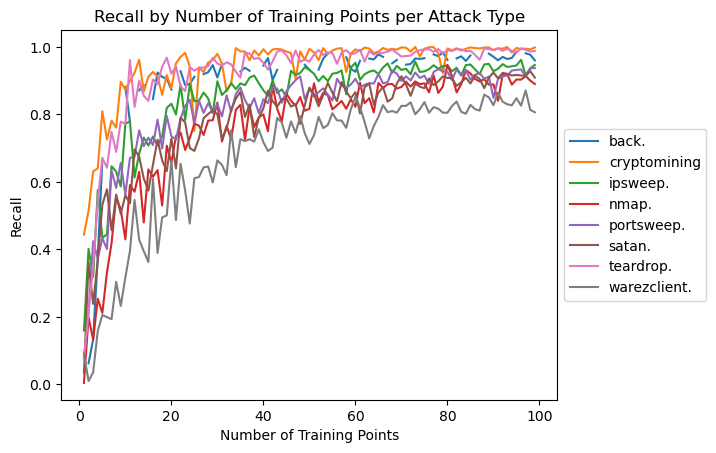

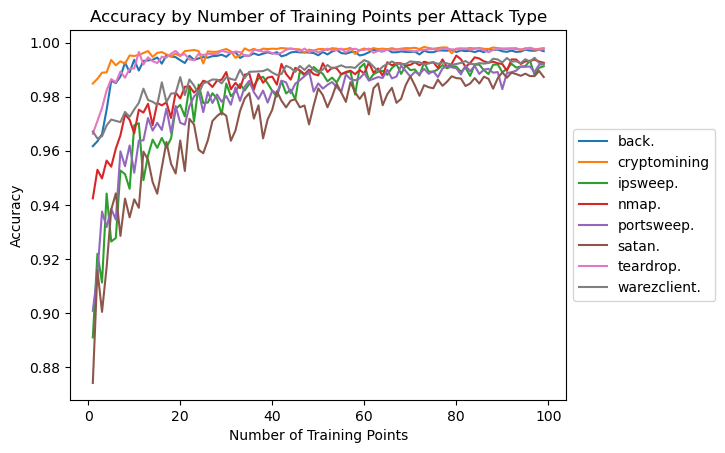

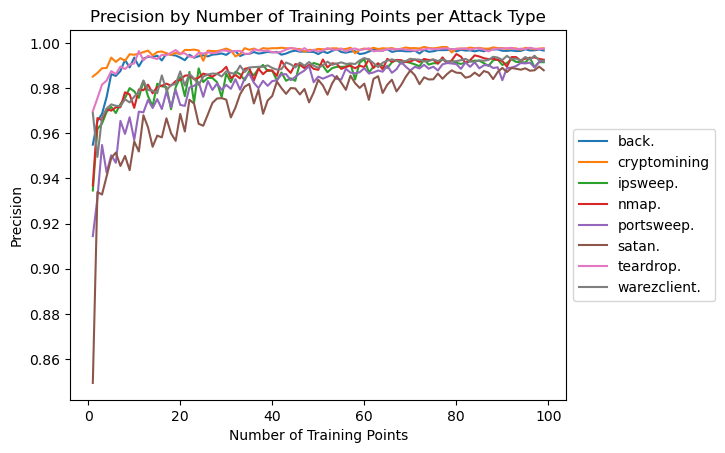

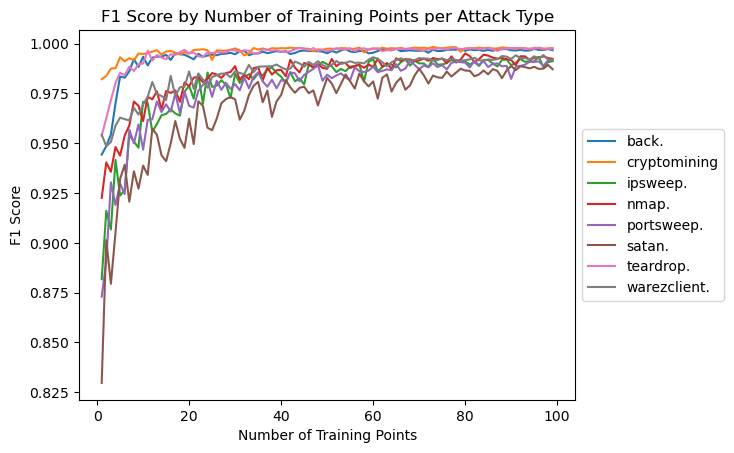

In [48]:
plot_names = ["Recall", "Accuracy", "Precision", "F1 Score"]

for i in range(4):
    for v in res:
        lab = v[0]

        if lab in ["normal.", "smurf.", "neptune."]:
            continue

        data = v[1][i]
        plt.plot(new_range, data, label=lab)    

    plt.title(f"{plot_names[i]} by Number of Training Points per Attack Type")
    plt.xlabel("Number of Training Points")
    plt.ylabel(f"{plot_names[i]}")

    # plt.ylim((0, 1))

    plt.legend(loc="center left", bbox_to_anchor=(1, .5))

    plt.savefig(f"{plot_dir}/figs/{plot_names[i]}.png")
    plt.show()

In [49]:
stat_col_names = ["New_Attack_Training_Points", "New_Attack_Recall", "Model_Accuracy", "Model_Precision", "Model_F1"]

for a, v in res:
    print(f"{a=}, {v=}")
    df_stats = pd.DataFrame(columns=stat_col_names)
    df_stats['New_Attack_Training_Points'] = new_range
    df_stats["New_Attack_Recall"] = v[0]
    df_stats["Model_Accuracy"] = v[1]
    df_stats["Model_Precision"] = v[2]
    df_stats["Model_F1"] = v[3]

    df_stats.to_csv(f"{plot_dir}stats/{a}_attack_stats.csv")

a='back.', v=([np.float64(nan), np.float64(0.06263102725366876), np.float64(0.13352570828961174), np.float64(0.37788865546218486), np.float64(0.6669295478443743), np.float64(nan), np.float64(0.7118018967334037), np.float64(nan), np.float64(nan), np.float64(0.8816067653276956), np.float64(0.7783068783068783), np.float64(nan), np.float64(0.8708907741251326), np.float64(0.8869426751592356), np.float64(nan), np.float64(0.8454787234042553), np.float64(0.9241214057507987), np.float64(0.9112473347547975), np.float64(0.9058164354322306), np.float64(0.87366452991453), np.float64(nan), np.float64(0.9279978586723769), np.float64(0.8866559485530547), np.float64(0.8905579399141631), np.float64(0.9116541353383458), np.float64(nan), np.float64(0.9192680301399354), np.float64(0.9251077586206896), np.float64(0.9460625674217907), np.float64(0.9092872570194386), np.float64(0.9502702702702702), np.float64(nan), np.float64(0.9052004333694474), np.float64(nan), np.float64(0.9267100977198697), np.float64(0.9

In [58]:
def save_stats(res, path: str, debug=False):
    os.mkdir(path)
    os.mkdir(f"{path}figs/")
    os.mkdir(f"{path}stats/")

    plot_names = ["Recall", "Accuracy", "Precision", "F1 Score"]
    stat_col_names = ["New_Attack_Training_Points", "New_Attack_Recall", "Model_Accuracy", "Model_Precision", "Model_F1"]

    for i in range(4):
        for v in res:
            lab = v[0]
            data = v[1][i]
            
            plt.plot(new_range, data, label=lab)    

        plt.title(f"{plot_names[i]} by Number of Training Points per Attack Type")
        plt.xlabel("Number of Training Points")
        plt.ylabel(f"{plot_names[i]}")

        plt.legend(loc="center left", bbox_to_anchor=(1, .5))

        plt.savefig(f"{path}/figs/{plot_names[i]}.png")
        plt.cla()

    for a, v in res:
        if debug:
            print(f"{a=}, {v=}")
        df_stats = pd.DataFrame(columns=stat_col_names)
        df_stats['New_Attack_Training_Points'] = new_range
        df_stats["New_Attack_Recall"] = v[0]
        df_stats["Model_Accuracy"] = v[1]
        df_stats["Model_Precision"] = v[2]
        df_stats["Model_F1"] = v[3]

        df_stats.to_csv(f"{path}stats/{a}_attack_stats.csv")

    if debug:
        print(f"Files saved to {path}")

    return 0

0

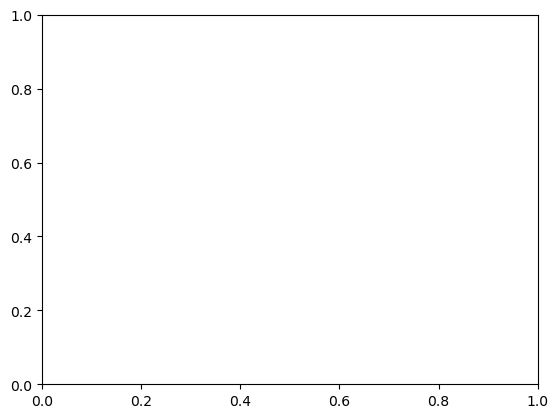

In [60]:
save_stats(res, path="./plots/small_df_100/")